### 1. Setup 

#### 1.1. Install Dependencies

In [1]:
!pip install tensorflow opencv-python matplotlib

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


In [29]:
%config Completer.use_jedi = False

#### 1.2. Import Dependencies

In [2]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

#### 1.3. Set GPU Growth

#### 1.4. Create Folder Structures

In [5]:
# Setup Paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [6]:
POS_PATH

'data\\positive'

In [9]:
# Make the Directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

### 2. Collect Positives and Anchors

#### 2.1. Untar Labelled Faces in the Wild Dataset

In [10]:
# http://vis-www.cs.umass.edu/lfw/

In [12]:
# Uncompress Tar GZ labelled Faces in the Wild Dataset
!tar xzf lfw.tgz

In [14]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

#### 2.2. Collect Positive and Anchor Classes

In [24]:
# Import UUID library to generate unique image names
import uuid

In [25]:
uuid.uuid1()

UUID('f9c8019f-045b-11ed-b81d-4cebbd9382b8')

In [30]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Cut down frame to 250x250px
    frame = frame[120:120+250, 200:200+250, :]
    
    # Collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor path
        cv2.imwrite(imgname, frame)
        
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor path
        cv2.imwrite(imgname, frame)        
    
    # Show image back to the screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()

# Close the image show frame
cv2.destroyAllWindows()

In [19]:
frame[:250, :250, :250].shape

(250, 250, 3)

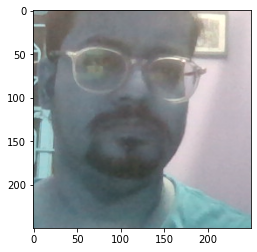

In [22]:
plt.imshow(frame[120:120+250, 200:200+250, :])

### 3. Load and Preprocess Images

#### 3.1. Get Image Directories

In [31]:
anchor = tf.data.Dataset.list_files(ANC_PATH + '\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH + '\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH + '\*.jpg').take(300)

In [33]:
dir_test = anchor.as_numpy_iterator()

In [39]:
print(dir_test.next())

b'data\\anchor\\f4116245-045c-11ed-8122-4cebbd9382b8.jpg'


#### 3.2. Preprocessing - Scale and Resize

In [40]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1
    img = img / 255.0
    
    # Return the image 
    return img

In [43]:
img = preprocess('data\\anchor\\f4116245-045c-11ed-8122-4cebbd9382b8.jpg')

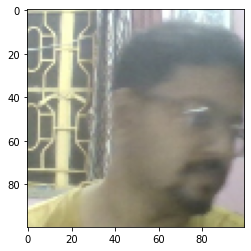

In [44]:
plt.imshow(img)

In [45]:
img.numpy().min()

0.18921569

In [46]:
img.numpy().max()

1.0

#### 3.3. Create Labelled Dataset 

In [47]:
# 

<tf.Tensor: shape=(), dtype=int32, numpy=1>

#### 3.4. Build Train and Test Partition

### 4. Model Engineering

#### 4.1. Build Embedding Layer

#### 4.2. Build Distance Layer

#### 4.3. Make Siamese Model

### 5. Training